# Data and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/Users/mokakash/Documents/MAIN/DATA LEARN/Portfolio_Projects/Python_Projects/NFT_Trades/Assets/NFT_Raw_Data.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Date,NFT Name,ITEM,Method,Alpha Group,Mint/NFT Cost (ETH),Mint/NFT Cost ($),Gas Fee (ETH),Gas Fees ($),Listing Fee Total (ETH),...,OS Fee,Royalty Fee,Total Fees (ETH),Initial + Fee (ETH),Eth Expect to Receive,Profit/Loss (ETH),Location,Type,Wallet,Transfer?
0,01/02/2022,NaN,9268,Mint,NP,0.069,261.55,0.0099,37.55,0.0305,...,0.025,0.035,0.0473,0.1163,0.1072,-0.0023,MM Wallet,NFT,Old Wallet,NO
1,01/02/2022,NaN,9269,Mint,NP,0.069,261.55,0.0099,37.55,0.0000,...,0.025,0.035,0.0173,0.0863,0.1156,0.0367,MM Wallet,NFT,Old Wallet,NO
2,01/02/2022,NaN,44,Mint,NP,0.020,24.35,0.0030,3.61,0.0009,...,0.025,0.050,0.0093,0.0293,0.0675,0.0437,MM Wallet,NFT,Old Wallet,NO
3,01/02/2022,NaN,45,Mint,NP,0.020,24.35,0.0030,3.61,0.0000,...,0.025,0.050,0.0119,0.0319,0.1101,0.0871,MM Wallet,NFT,Old Wallet,NO
4,01/02/2022,NaN,1,Mint,TW,0.000,0.00,0.0019,2.36,0.0010,...,0.025,0.000,0.0029,0.0029,0.0000,-0.0029,MM Wallet,NFT,Old Wallet,Transfer Sent


# Data PreProcessing and Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     542 non-null    object 
 1   NFT Name                 0 non-null      float64
 2   ITEM                     543 non-null    int64  
 3   Method                   543 non-null    object 
 4   Alpha Group              543 non-null    object 
 5   Mint/NFT Cost (ETH)      543 non-null    float64
 6   Mint/NFT Cost ($)        543 non-null    object 
 7   Gas Fee (ETH)            543 non-null    float64
 8   Gas Fees ($)             543 non-null    float64
 9   Listing Fee Total (ETH)  543 non-null    float64
 10  Listing Fee Total ($)    543 non-null    float64
 11  Cost of Trade (ETH)      543 non-null    float64
 12  Sell Price (ETH)         320 non-null    float64
 13  Breakeven                543 non-null    float64
 14  OS Fee                   5

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
# Check data type of the 'Date' column
date_column_dtype = df['Date'].dtype
print(f"The data type of the 'Date' column is now: {date_column_dtype}")

The data type of the 'Date' column is now: datetime64[ns]



**I use a heatmap to visually verify the cleanliness of my DataFrame from missing data/null values. 
This method visually assists me while I keep cleaning the dataset.**

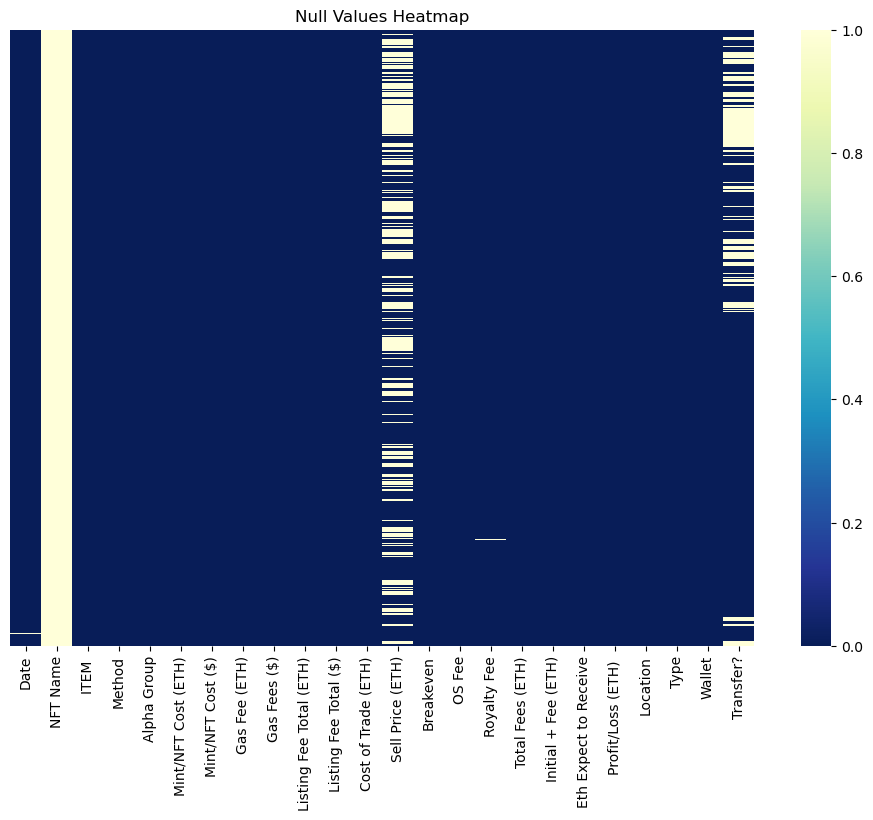

In [8]:
# Creating a heatmap of null values with yellow for nulls and blue for non-nulls
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='YlGnBu_r', yticklabels=False)
plt.title('Null Values Heatmap')
plt.show()

In [8]:
df[df['Date'].isnull()]

,Date,NFT Name,ITEM,Method,Alpha Group,Mint/NFT Cost (ETH),Mint/NFT Cost ($),Gas Fee (ETH),Gas Fees ($),Listing Fee Total (ETH),...,OS Fee,Royalty Fee,Total Fees (ETH),Initial + Fee (ETH),Eth Expect to Receive,Profit/Loss (ETH),Location,Type,Wallet,Transfer?
532,NaT,NaN,66,Mint,AZ,0.002,2.44,0.0004,0.47,0.0,...,0.025,0.0,0.0007,0.0027,0.0117,0.0093,MM Wallet,NFT,Old Wallet,NO


In [9]:
# Drop rows where 'Date' column has null values
df = df.dropna(subset=['Date'])

# Verifies if any null values remain in the 'Date' column
df[df['Date'].isnull()]

,Date,NFT Name,ITEM,Method,Alpha Group,Mint/NFT Cost (ETH),Mint/NFT Cost ($),Gas Fee (ETH),Gas Fees ($),Listing Fee Total (ETH),...,OS Fee,Royalty Fee,Total Fees (ETH),Initial + Fee (ETH),Eth Expect to Receive,Profit/Loss (ETH),Location,Type,Wallet,Transfer?


In [10]:
# Renaming the column 'Transfer?' to 'Transfer'
df = df.rename(columns={'Transfer?': 'Transfer'})

# Filling null or blank values in the 'Transfer' column with 'NO'
df['Transfer'] = df['Transfer'].fillna('NO')

# Verify changes in the column and data
print(df['Transfer'].value_counts())

Transfer
NO                   509
Transfer Received     17
Transfer Sent         16
Name: count, dtype: int64


In [11]:
df[df['Royalty Fee'].isnull()]

,Date,NFT Name,ITEM,Method,Alpha Group,Mint/NFT Cost (ETH),Mint/NFT Cost ($),Gas Fee (ETH),Gas Fees ($),Listing Fee Total (ETH),...,OS Fee,Royalty Fee,Total Fees (ETH),Initial + Fee (ETH),Eth Expect to Receive,Profit/Loss (ETH),Location,Type,Wallet,Transfer
449,2022-10-12,NaN,1907,Mint,WP,0.0,0.00,0.0019,2.47,0.0,...,0.025,NaN,0.0019,0.0019,0.0,-0.0019,MM Wallet,NFT,Ledger,NO


In [12]:
#df['Royalty Fee'] = pd.to_numeric(df['Royalty Fee'], errors='coerce')

# Calculate the mean of non-null entries in the 'Royalty Fee' column
royalty_fee_mean = df['Royalty Fee'].mean()


# Fill null or empty values in 'Royalty Fee' with the calculated mean
df['Royalty Fee'].fillna(royalty_fee_mean, inplace=True)

# Print the mean value
print({royalty_fee_mean})

{0.051763401109057305}


In [13]:
df[df['Royalty Fee'].isnull()]

,Date,NFT Name,ITEM,Method,Alpha Group,Mint/NFT Cost (ETH),Mint/NFT Cost ($),Gas Fee (ETH),Gas Fees ($),Listing Fee Total (ETH),...,OS Fee,Royalty Fee,Total Fees (ETH),Initial + Fee (ETH),Eth Expect to Receive,Profit/Loss (ETH),Location,Type,Wallet,Transfer


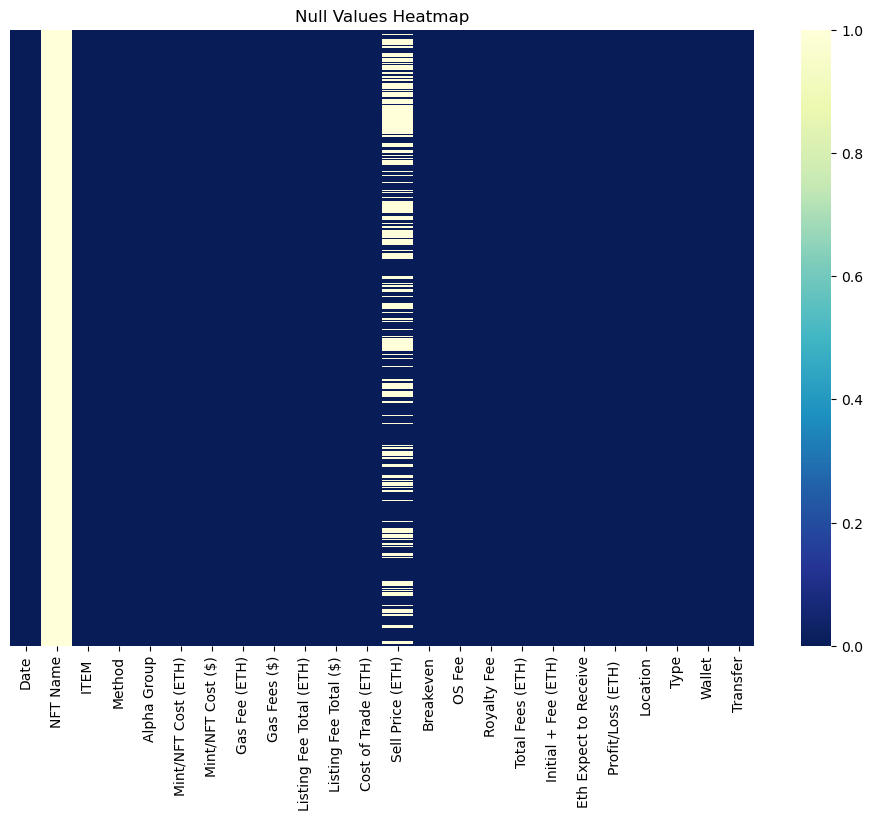

In [15]:
# To check the progress of cleaning NULL/Missing values, re-creating a heatmap of null values with yellow for nulls and blue for non-nulls
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='YlGnBu_r', yticklabels=False)
plt.title('Null Values Heatmap')
plt.show()

In [16]:
# Fill null or blank values in 'Sell Price (ETH)' with '0'
df['Sell Price (ETH)'].fillna(0, inplace=True)

# Verify changes in the column
print(df['Sell Price (ETH)'].head())

0    0.114
1    0.123
2    0.073
3    0.119
4    0.000
Name: Sell Price (ETH), dtype: float64


In [17]:
# Replace 'Old Wallet' with 'Main' in 'Wallet' column
df['Wallet'].replace('Old Wallet', 'Main', inplace=True)

# Verify changes in the column
print(df['Wallet'].value_counts())

Wallet
Main      336
Ledger    171
Burner     35
Name: count, dtype: int64


In [18]:
# Identify unique values in the 'Method' column
unique_methods = df['Method'].unique()

# Display unique values
print(unique_methods)

['Mint' 'Secondary' '2nd Market' 'Airdrop' '2ndary' 'Mnt']


In [19]:
# Update 'Method' based on conditions
method_mapping = {
    '2nd Market': 'Secondary',
    '2ndary': 'Secondary',
    'Mnt': 'Mint'
}

df['Method'] = df['Method'].replace(method_mapping)

In [20]:
# Sanity check to make sure it worked.
unique_methods = df['Method'].unique()

# Display unique values
print(unique_methods)

['Mint' 'Secondary' 'Airdrop']


In [21]:
# List of columns to remove
columns_to_remove = ['NFT Name', 'ITEM ', 'Location', 'Type', 'Eth Expect to Receive', 'Initial + Fee (ETH)', 'Breakeven','Listing Fee Total ($)','Gas Fees ($)']

# Drop the specified columns
df = df.drop(columns=columns_to_remove)

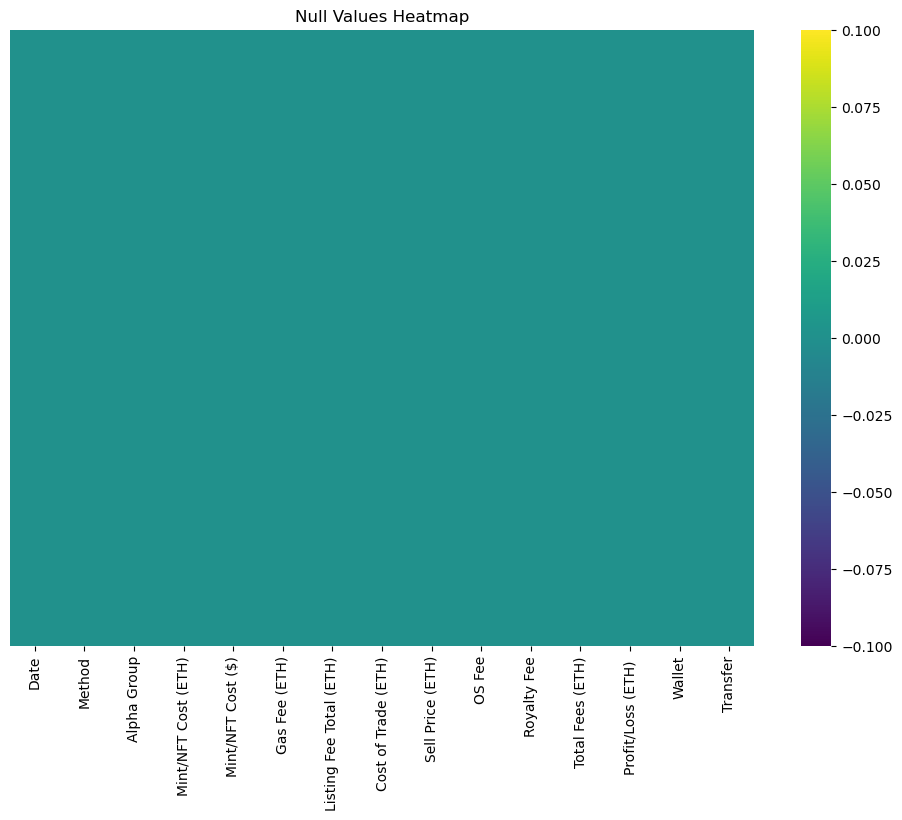

In [26]:
# Recreating a heatmap to visually verify if my dataset is free of any NULL or missing values.
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)
plt.title('Null Values Heatmap')
plt.show()

My Heatmap visualization shows NO yellow (indicating missing or null values), it implies that my DataFrame doesn't contain any more null values :)

**Exporting cleaned DataFrame 'df' to a CSV file for future EDA**

In [24]:
df.to_csv('NFT_Cleaned_Data.csv', index=False)